## Initial imports

In [1]:
import pyCRS
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 150, 150

## Property prediction from SMILES (ethyl acetate)

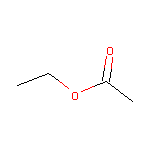

In [2]:
#smiles = 'CCO' # ethanol
smiles = 'O=C(OCC)C' # ethyl acetate
rdkit_mol = Chem.MolFromSmiles(smiles)
rdkit_mol   # show the molecule in a Jupyter notebook

### Temperature-independent properties

In [3]:
print(f"SMILES: {smiles}\n")
mol = pyCRS.Input.read_smiles(smiles)

temperatures = [298.15, 308.15, 318.15, 328.15, 338.15]
pyCRS.PropPred.estimate(mol, temperatures=temperatures) 

for prop, value in mol.properties.items():
    unit = pyCRS.PropPred.units[prop]
    print(f'{prop:<20s}: {value:.3f} {unit}')

SMILES: O=C(OCC)C

boilingpoint        : 339.131 K
criticalpressure    : 38.243 bar
criticaltemp        : 544.189 K
criticalvol         : 0.271 L/mol
dielectricconstant  : 6.834 
entropygas          : 382.780 J/(mol K)
flashpoint          : 265.005 K
gidealgas           : -323.540 kJ/mol
hcombust            : -2075.882 kJ/mol
hformstd            : -462.595 kJ/mol
hfusion             : 11.717 kJ/mol
hidealgas           : -437.815 kJ/mol
hsublimation        : 55.394 kJ/mol
meltingpoint        : 179.420 K
molarvol            : 0.098 L/mol
parachor            : 215.764 
solubilityparam     : 9.069 √(cal/cm^3)
synacc              : 1.756 
tpt                 : 178.434 K
vdwarea             : 129.168 Å²
vdwvol              : 89.171 Å³


### Temperature-dependent properties (vapor pressure)

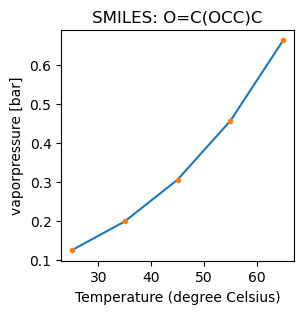

In [4]:
prop = 'vaporpressure'
unit = pyCRS.PropPred.units[prop]
temperatures_K, vaporpressures = zip(*mol.properties_tdep[prop])
temperatures_C = [t - 273.15 for t in temperatures_K]  # convert to Celsius

plt.figure(figsize=(3,3))
plt.plot(temperatures_C, vaporpressures)
plt.plot(temperatures_C, vaporpressures, '.')
plt.xlabel("Temperature (degree Celsius)")
plt.title(f'SMILES: {smiles}')
plt.ylabel(f"{prop} [{unit}]");

## Create .csv for multiple compounds

Define a list of compounds by their SMILES strings. This example also shows how to only calculate a subset of all properties.

Note: The SMILES string 'C' corresponds to methane which is too small to be used with the property prediction tool, so the results are given as 'nan' (not a number).

In [5]:
smiles_list = [
    'CCO', 
    'CCOC', 
    'OCCCN', 
    'C', # methane is too small to be used with property prediction and will return "nan"
    'C1=CC=C(C=C1)COCC2=CC=CC=C2'
]
temperatures = list(range(280,340,10))

mols = [pyCRS.Input.read_smiles(s) for s in smiles_list]

properties = ["boilingpoint", "criticaltemp", "hformstd"]

for mol in mols:
    pyCRS.PropPred.estimate(mol, properties, temperatures=temperatures) 

In [6]:
def get_csv(mols, properties):
    header = "SMILES"
    for prop in properties:
        unit = pyCRS.PropPred.units[prop]
        if unit:
            unit = f' [{unit}]'
        else:
            unit = ''
            
        header += f',{prop}{unit}'
    ret = header + '\n'
    
    for mol in mols:
        s = f'{mol.smiles}'
        for prop in properties:
            value = mol.properties.get(prop, '')
            try:
                s += f',{value:.4f}'
            except TypeError:
                s += f',{value}'
        s += '\n'
        ret += s
    return ret

In [7]:
csv = get_csv(mols, properties)
print(csv)

# To write to a .csv file:
#with open('outputfile.csv', 'w') as f: 
#    f.write(csv)

SMILES,boilingpoint [K],criticaltemp [K],hformstd [kJ/mol]
CCO,337.6259,442.0008,-271.9478
CCOC,296.4144,425.7282,-213.6494
OCCCN,432.7489,541.4748,-290.7921
C,nan,nan,nan
C1=CC=C(C=C1)COCC2=CC=CC=C2,558.7903,661.7012,-167.0454



### Bar chart for multiple compounds

Continuing from the previous example, you can also create e.g. a bar chart with the boiling points:

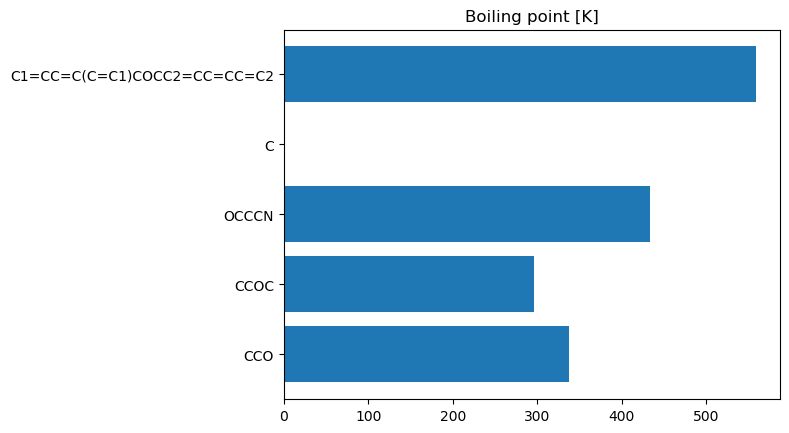

In [8]:
prop = 'boilingpoint'
values = [mol.properties.get(prop, None) for mol in mols]
plt.barh(smiles_list, values)
plt.title('Boiling point [K]');